# Building a Sentiment Analysis of Tweets 
## Background
Since Iran’s Foreign Minister tweeted that Iran was providing medical aid to Lebanon, PITAPOLICY conducted a twitter sentiment analysis of Iran’s Foreign Minister Javed Zarif in the midst of Lebanon’s tragic, non-nuclear explosion to review official leaders’ responses on social media regarding aid to Lebanon. Below are sample results of his 200 most recent tweets. Although mostly positive or neutral with respect to the Beirut Explosion in expressing humanitarian solidarity, the negative tweets reference discussion on deteriorating relations with the U.S. and hopes for reinitiating the Joint Comprehensive Plan of Action, JCPOA, regarding Iran’s previous nonproliferation agreement. In 2016, Donald Tr ump’s administration removed the U.S. from this peaceful measure towards nuclear containment. 

## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use Latent Semantic Analysis and clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 

#### 1
Clean tweets to review sentiment.
#### 2
Use vocabulary based on Textblob library, which includes its own biases, to measure 'polarity', 'subjectivity', 'posivity', 'negativity', and 'neutral'. 

#### 3
We could use a LSA used to compare how similar the tweets are to one another in the dataset since that is unlabeled. 

#### 4
Split tweets into training and test data sets to see how similar his tweets are to another--we are looking for content consistency. 

#### 5
We could  use Word2Vec and plot using t-SNE cluster on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.

## Summary of Results:
We see that Javed Zarif has 1584269 followers.

As mentioned earlier, this Twitter account’s sample (@Jzarif) of 200 tweets reflects mostly positive tweets as shown. (http://www.pitapolicy.com/twitter-sentiment-analysis-of-iranian-foreign-minister-javed-zarif/) We again see it in the more recent graph shown in green representing mostly positive tweets during crisis. Approximately 75 percent of the tweets are positive, thus 25 percent are neutral.

We measured both ‘subjectivity’ and ‘polarity’ and see that Javed’s tweets concentrate between -0.2 and .4 on the ‘polarity’ and skew positively.

These were the top 10 hashtags and themes trending in Washington, DC at that time:
* Biden 
* Lebanon 
* Hiroshima 
* #BB22
* #FOURTHCOUNTDOWN 
* The NRA 
* Pence 
* Lakers 
* Letitia James 
* Independence Day

After completing TFIDF, we constructed an LSA model to identify semantic analysis. We see that there's little difference between the train and test sets of LSA samples. As such, PITAPOLICY concludes that the Twitter user is consistent about his messages. 

Regarding more unsupervised techniques, like clustering: we employed 'K-means', 'DBSAN', and 'T-SNE'. T-SNE ploted more clustered topics than K-Means. DBSCAN cluster showed the least promising results.

In future, we will use TFIDF to compare topic modeling results using Latent Dirichlect Allocation and Non-negative Matrix Formation (NNMF).

In [4]:
!pip install tweepy
#https://github.com/RaRe-Technologies/gensim/issues/2000

In [ ]:
!pip install tweetutilities

In [ ]:
!pip install geopy

In [ ]:
!pip install textblob

In [ ]:
!pip install preprocessor

In [ ]:
!pip install gensim

In [21]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [6]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [8]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Thanks to @SecPompeo, we now know criteria for a country to be removed from—or included in—State Dept's terror list: 

Relations with Israel.

World's No.1 nuclear threat, rights violator, illegal occupier &amp; terror entity

How can the world STILL take US foreign policy seriously? https://t.co/TR4NVWdKCy

2) .@SecPompeo ‘s lawless bullying leaves US isolated again:

While US prevented a Sec. Council debate about its unlawful notification on Friday, members in today's meeting on ME refuted U.S.’ attempt as null and void.

Time for @realDonaldTrump to stop listening to novice bullies. https://t.co/nHrRUzlj7N

3) Very productive mtg w/ IAEA @rafaelmgrossi

Iran has been fully transparent: over 92 percent of IAEA total comparable global inspections were carried out in Iran.

Some are intent to torpedo transparency thru pressure to reopen closed matters. 
 
We want normal relations w/ IAEA. https://t.co/t9vnwHGAsk

4) Outlaw @SecPompeo has no qualms a

In [9]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,"Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...
5,In their own words: https://t.co/fFNjWj5xQa
6,Factsheet on the illegitimate and felonious U....
7,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
8,"67 years ago today, US/UK tried to suffocate t..."
9,I'll be delivering the fourth of five online t...


In [7]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [8]:
zarif_tweets_user.status.text

'In their own words: https://t.co/fFNjWj5xQa'

In [9]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [10]:
#followers as a column
zarif_tweets_user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x11f678190>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1584269, 'friends_count': 10, 'listed_count': 4061, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 955, 'lang': None, 'status': {'created_at': 'Sat Aug 22 16:52:37 +0000 2020', 'id': 1297215107626414082, 'id_str': '1297215107626414082', 'text': 'In their own words: https://t.co/fFNjWj5xQa', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1297214866076438533, 'id_str': '1297214866076438533', 'indices': [20, 43], 'media_url'

In [11]:
#Number of Followers
zarif_tweets_user.followers_count

1584269

In [12]:
#Number of Friends
zarif_tweets_user.friends_count

10

In [13]:
followers =[]

In [14]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [15]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['mohadesehzaman1']
['mohadesehzaman1', 'Erphanov']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2', 'Pooria33088439']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2', 'Pooria33088439', 'Behzad5050']


In [16]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: Behzad5050bosaif_qtrDihahs10Erphanovkhande_bazar_2mohadesehzaman1Pooria33088439reza35939797semohossei_niuLsMJ4qTVBAvzcW


In [17]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)
print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [18]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


## Clean Text

In [13]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'\n', ' ', text, flags=re.MULTILINE)
    return text

#Cleaning the text
df['tweets_fixed'] = df['Tweets'].apply(clean_text)
df

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi Ir...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US #EconomicTerrorism &amp; bl...,Our response to US EconomicTerrorism blackmai...
196,Subjecting construction workers to #EconomicTe...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [14]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

# Exploratory Data Analysis: Word Cloud

### Figures 1: Wordclouds

<function matplotlib.pyplot.show(*args, **kw)>

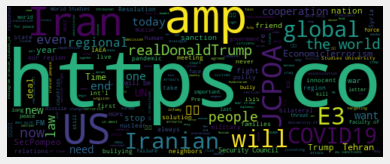

In [22]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

## Term Frequency Inverse Document Frequency: Constructing Vectors from TFIDF
TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

# PAUSE AND SKIP

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix: 
                            #tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
vectors_tfidf = tfidf_vectorizer.fit_transform(df['tweets_fixed'])
vectors_tfidf
#Matrix is 200 by 700

<200x700 sparse matrix of type '<class 'numpy.float64'>'
	with 2511 stored elements in Compressed Sparse Row format>

# UNPAUSE 
RAN LDA AND NNMF FROM SCIKIT LEARN INSTRUCTIONS:
https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [18]:
df['tweets_fixed']

0      Thanks to @SecPompeo, we now know criteria for...
1      .@SecPompeo ‘s lawless bullying leaves US isol...
2      Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3      Outlaw @SecPompeo has no qualms about violatin...
4      My fifth and concluding online discussion of t...
                             ...                        
195    Our response to US #EconomicTerrorism &amp; bl...
196    Subjecting construction workers to #EconomicTe...
197    Returned from Geneva where I met with Russian ...
198    Contrary to its deceptive claims, new US regul...
199    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: tweets_fixed, Length: 200, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [25]:
results = tfidf_vectorizer.fit_transform(df['tweets_fixed'])

In [26]:
results

<200x2680 sparse matrix of type '<class 'numpy.float64'>'
	with 4634 stored elements in Compressed Sparse Row format>

In [43]:
# Import NNMF and LDA
    #Define Function: PRINT_TOP_WORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [44]:
lda = LatentDirichletAllocation()

In [45]:
lda.fit(results)

LatentDirichletAllocation()

In [46]:
#wtf_df = pd.DataFrame(lda.components_, columns=tfidf_vectorizer.get_feature_names())
lda_df = pd.DataFrame(lda.components_, columns=tfidf_vectorizer.get_feature_names())
lda_df

,000,06p1lmmwgf,0jjb9jaljw,0usmqgpnln,10,1000s,104,11,12,1230,...,比起2009年美国对h1n1流感的防控,祝福中国人民鼠年安康,要特别祝中国朋友们端午安康,让人们对中国打赢疫情防控战充满信心,谴责美国持续非法制裁严重妨碍伊朗抗击疫情努力,造物之初本一体,阿丹子孙皆兄弟,阿富汗和平进程等共同关心的问题交换了意见,非常高兴再次和我的老朋友,鼠年吉祥
0,0.296145,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.401511,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.433333,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,0.306096,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.100000,0.100000,0.100000,0.100000,0.100000,0.317187,0.100000,0.100000,0.100000,0.827494,...,0.100000,0.100000,0.100000,0.100000,0.477964,0.100000,0.100000,0.477964,0.477964,0.100000
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
5,0.100000,0.424675,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100002,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
6,0.100000,0.100000,0.328588,0.100000,0.100546,0.100000,0.100000,0.100000,1.015429,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.476132
7,0.100000,0.100000,0.100000,0.100000,0.258906,0.100000,0.291257,0.295408,0.100000,0.100000,...,0.100000,0.453553,0.100000,0.453553,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
8,0.100000,0.100000,0.100000,0.332989,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.416228,0.416228,0.100000,0.100000,0.100000
9,0.100000,0.100000,0.100000,0.100000,0.291590,0.100000,0.100000,0.100000,0.100003,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [47]:
for number in range(lda_df.shape[0]):
  print(lda_df.iloc[number].idxmax())

amp
people
amp
amp
amp
iran
world
jcpoa
amp
russian


In [48]:
#Obtain features with LDA model
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (5, 100))
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

#lda.fit(tf)
lda.fit(results)

Fitting LDA models with tf features, n_samples=5 and n_features=100...


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [49]:
print("\nTopics in LDA model:")
tf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: 也祝中国朋友们新年快乐 detailed life clowns https influential x2fhgwoney imagine 在2020年 我很高兴在北京和中国朋友们共同度过了2019年的最后一天 鼠年吉祥 models rebuttal ebtekarm 我希望推动伊中全面战略伙伴关系持续稳步发展 iabbasian sea shortages rt prophet
Topic #1: amp published transition https arrogant collectively pathological leaves affects international covid19 iraq baluchistan approach مع disrepute reunited costs proud world
Topic #2: https ffnjwj5xqa jcpoa economicterrorism designed need admits breaches law deal innocent add persian peace won 6vcv2elr3i high case governments sites
Topic #3: amp https iran families world victims don countries armed upheld consulates maximum transition measures attack utc embassies colleagues today assistance
Topic #4: amp cooperation fm iran inclusive meetings neighbors ministerial initiatives synergy hope delusional forces christ abetting come muslim uk terrorist attending
Topic #5: amp iran sanctions e3 https home going hzhpdc20aj covid19 19th realdonaldtrump military jcpoa 

## Topic Modeling 
### NNMF: Non-Negative Matrix Factorization

In [50]:
# Use tf-idf features for NMF. #n_features = 1000
#n_components int or None
        #Number of components, if n_components is not set all features are kept.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features= 10,
                                   stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['tweets_fixed'])
tfidf


Extracting tf-idf features for NMF...


<200x10 sparse matrix of type '<class 'numpy.float64'>'
	with 402 stored elements in Compressed Sparse Row format>

In [51]:
# Fit the NMF model n_samples =10

n_samples =10
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf) #not results, but transformed df['tweets_fixed']from preceding cell

nmf

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=10 and n_features=1000...


NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=1)

In [52]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
#from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [53]:
tfidf

<200x10 sparse matrix of type '<class 'numpy.float64'>'
	with 402 stored elements in Compressed Sparse Row format>

In [54]:
#Cool results
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names



Topics in NMF model (Frobenius norm):


['amp',
 'covid19',
 'e3',
 'global',
 'https',
 'iran',
 'jcpoa',
 'people',
 'today',
 'world']

In [55]:
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: https world today people jcpoa iran global e3 covid19 amp
Topic #1: amp https iran world today people jcpoa global e3 covid19
Topic #2: iran amp world today people jcpoa https global e3 covid19
Topic #3: e3 jcpoa iran world today people https global covid19 amp
Topic #4: world https today people jcpoa iran global e3 covid19 amp
Topic #5: people world today jcpoa iran https global e3 covid19 amp
Topic #6: covid19 world today people jcpoa iran https global e3 amp
Topic #7: global https world today people jcpoa iran e3 covid19 amp
Topic #8: today https world people jcpoa iran global e3 covid19 amp
Topic #9: jcpoa e3 https iran world today people global covid19 amp



In [56]:
# Fit the NNMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
nmf

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


NMF(alpha=0.1, beta_loss='kullback-leibler', l1_ratio=0.5, max_iter=1000,
    n_components=10, random_state=1, solver='mu')

In [57]:
#Different topics obtained from Kullback-Leibler Divergence
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: https amp world today people jcpoa iran global e3 covid19
Topic #1: amp iran world today people jcpoa https global e3 covid19
Topic #2: iran world today people jcpoa https global e3 covid19 amp
Topic #3: e3 jcpoa https world today people iran global covid19 amp
Topic #4: world today people jcpoa iran https global e3 covid19 amp
Topic #5: people today world jcpoa iran https global e3 covid19 amp
Topic #6: covid19 world today people jcpoa iran https global e3 amp
Topic #7: global today iran world people jcpoa https e3 covid19 amp
Topic #8: today world people jcpoa iran https global e3 covid19 amp
Topic #9: jcpoa iran world today people https global e3 covid19 amp



## Clustering

### KMeans Cluster

In [60]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X1 = oe.fit_transform(tfidf)
X1

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans(n_clusters=20)

kmeans.fit(X1)

MiniBatchKMeans(n_clusters=20)

In [68]:
k_means = KMeans(n_clusters=20, random_state=123)
k_means.fit(X1)
y_pred = k_means.predict(X1)

## Plot the solution.
#plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
#plt.show()

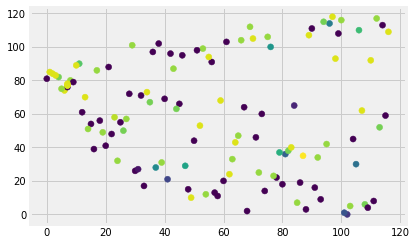

In [69]:
# Plot the KMeans solution.
plt.scatter(X1[:,0], X1[:,1], c=y_pred)
plt.show()

## Visualizing Vectors: TSNE Plot
Using 'word2vec' allows us to identify similarities between words that never occur near one another in the tweets.

In [122]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='svd', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tweets_by_component) #SVD: substituted dimension reduction for 'pca'

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy =(x[i], y[i]),
                     xytext =(5, 2),
                     textcoords ='offset points',
                     ha ='right',
                     va ='bottom')
    plt.show()

In [127]:
from gensim.models import Word2Vec

word2vec = Word2Vec(df.tweets_fixed, min_count=2)

In [128]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'I': <gensim.models.keyedvectors.Vocab object at 0x120113910>, 'n': <gensim.models.keyedvectors.Vocab object at 0x1201e59d0>, ' ': <gensim.models.keyedvectors.Vocab object at 0x1200c20d0>, 't': <gensim.models.keyedvectors.Vocab object at 0x1200c2190>, 'h': <gensim.models.keyedvectors.Vocab object at 0x1200f2f90>, 'e': <gensim.models.keyedvectors.Vocab object at 0x1200f2f50>, 'i': <gensim.models.keyedvectors.Vocab object at 0x1200f2dd0>, 'r': <gensim.models.keyedvectors.Vocab object at 0x1200f2e10>, 'o': <gensim.models.keyedvectors.Vocab object at 0x1200f2d90>, 'w': <gensim.models.keyedvectors.Vocab object at 0x1200f2c50>, 'd': <gensim.models.keyedvectors.Vocab object at 0x1200f2d10>, 's': <gensim.models.keyedvectors.Vocab object at 0x1200f2b90>, ':': <gensim.models.keyedvectors.Vocab object at 0x1200f2b10>, 'F': <gensim.models.keyedvectors.Vocab object at 0x1200f2b50>, 'a': <gensim.models.keyedvectors.Vocab object at 0x1200f2ad0>, 'c': <gensim.models.keyedvectors.Vocab object at 0x120

In [ ]:
#Substituted tweets_fixed_tfidf 
# then tweets_by_component for corpus 
##Correction
#print(tweets_by_component)

model = word2vec.Word2Vec(vocabulary, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

## DBSCAN Cluster


In [132]:
#new cluster 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(tweets_by_component)

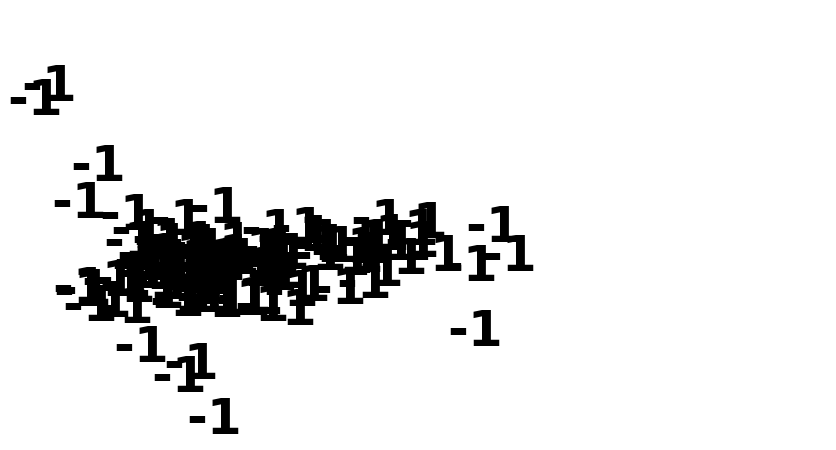

In [133]:
pca = PCA(n_components=2).fit_transform(tweets_by_component)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             #color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [136]:
from sklearn.cluster import AgglomerativeClustering
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5) #select 5 clusters

# Fit model
clusters = agg_cluster.fit_predict(tweets_by_component)
clusters

array([0, 3, 0, 3, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 3, 4, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 1, 0, 1, 3, 4, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 4, 1, 0,
       0, 4, 0, 1, 4, 1, 1, 1, 0, 3, 3, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 1, 1, 1, 0, 0, 1, 0, 1, 0])